#### Sr. Engineer: Dhruv Singh <br> Course Name: EDHEC Portfolio Optimization <br> Lesson Name: Efficient Frontier, Part 2 <br> Date Updated: 01/09/2022

# The Efficient Frontier - Part II

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit_108 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["2011":"2016"], 12)
cov = ind["2011":"2016"].cov()

As a first exercise, let's assume we have some weights, and let's try and compute the returns and volatility of a portfolio, given a set of weights, returns, and a covariance matrix.

The returns are easy, so let's add this to our toolkit

```python

def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

```

The volatility is just as easy in matrix form:

```python
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5
```



In [2]:
l = ["QQQ", "IWF", "VOO", "SPY"]

In [3]:
er[l]

QQQ    0.138312
IWF    0.106167
VOO    0.101194
SPY    0.100621
dtype: float64

In [4]:
cov.loc[l,l]

,QQQ,IWF,VOO,SPY
QQQ,0.001555,0.001272,0.001181,0.001183
IWF,0.001272,0.001170,0.001112,0.001115
VOO,0.001181,0.001112,0.001103,0.001105
SPY,0.001183,0.001115,0.001105,0.001107


In [5]:
import pandas as pd
import numpy as np
ew = np.repeat(0.25, 4)
erk.portfolio_return(ew, er[l])

0.11157364972647138

In [6]:
erk.portfolio_vol(ew, cov.loc[l,l])

0.03434190101153735

# The 2-Asset Case

In the case of 2 assets, the problem is somewhat simplified, since the weight of the second asset is 1-the weight of the first asset.

Let's write a function that draws the efficient frontier for a simple 2 asset case.

Start by generating a sequence of weights in a list of tuples. Python makes it easy to generate a list by using something called a _list comprehension_ ... which you can think of as an efficient way to generate a list of values instead of writing a for loop.


In [7]:
import numpy as np

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]


In [8]:
type(weights)

list

In [9]:
len(weights)

20

In [10]:
weights[0]

array([0., 1.])

In [11]:
weights[4]

array([0.21052632, 0.78947368])

In [12]:
weights[19]

array([1., 0.])

<AxesSubplot:xlabel='V', ylabel='R'>

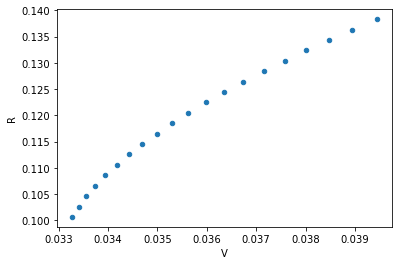

In [13]:
l = ["SPY", "QQQ"]
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.scatter(x="V", y="R")

We can create function that plots the frontier:

```python
def plot_ef2(n_points, er, cov):
    """
    Plots the 2-asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")
```

A useful summary of the visualization features in pandas is [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


<AxesSubplot:xlabel='Volatility'>

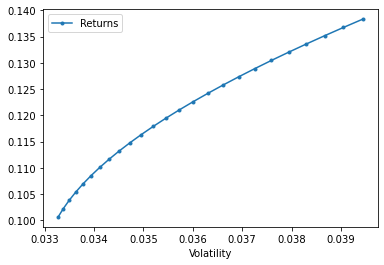

In [14]:
l = ["SPY", "QQQ"]
erk.plot_ef2(25, er[l].values, cov.loc[l,l])